## Uploading CSV for Video URLs

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import requests
from collections import Counter as C 

In [2]:
df = pd.read_csv('/Users/kaoutarlanjri/Desktop/Digital Project/url.csv', sep=',')
df.head()

https://quantifiedself.com/show-and-tell/?project=9  \
0  https://quantifiedself.com/show-and-tell/?proj...    
1  https://quantifiedself.com/show-and-tell/?proj...    
2  https://quantifiedself.com/show-and-tell/?proj...    
3  https://quantifiedself.com/show-and-tell/?proj...    
4  https://quantifiedself.com/show-and-tell/?proj...    

  diet and weight loss  |  food tracking  |  sports & fitness  \
0  cognition  |  sports & fitness  |  mood & emotion            
1         mood & emotion  |  productivity  |  stress            
2    diet and weight loss  |  productivity  |  sleep            
3                       cognition  |  mood & emotion            
4          diet and weight loss  |  sports & fitness            

                                              Fitbit  \
0  23andMe | coronary calcium scan | Fitbit | Ins...   
1                  self-report cognitive functioning   
2  Excel | Fitbit | Moves | MyFitnessPal | Runkee...   
3                                          SuperMemo   
4                                              scale   

                                          Unnamed: 3  \
0  Hello I’m Mark and I’m going to first publicly...   
1  I’m Jenny and I’m going to talk to you about m...   
2  I’m Kouris Kalligas. I run a startup called Ad...   
3  grade in high school, I hear seemed it took li...   
4                       Justin Timmer A Lazy Workout   

  https://player.vimeo.com/video/33565756?app_id=122963  
0  https://player.vimeo.com/video/96591409?app_id...     
1  https://player.vimeo.com/video/100583400?app_i...     
2  https://player.vimeo.com/video/104559409?app_i...     
3  https://player.vimeo.com/video/101714344?app_i...     
4  https://player.vimeo.com/video/100252684?app_i...

In [3]:
list_col = df.columns.tolist()
list_col

['https://quantifiedself.com/show-and-tell/?project=9',
 'diet and weight loss \xa0|\xa0 food tracking \xa0|\xa0 sports & fitness',
 'Fitbit',
 'Unnamed: 3',
 'https://player.vimeo.com/video/33565756?app_id=122963']

In [4]:
column_name = ['source', 'theme','tool', 'transcript', 'url_vid']


res = {list_col[i]: column_name[i] for i in range(len(list_col))} 
df = df.rename(columns=res)

In [5]:
df.tail()

source  \
334  https://quantifiedself.com/show-and-tell/?proj...   
335  https://quantifiedself.com/show-and-tell/?proj...   
336  https://quantifiedself.com/show-and-tell/?proj...   
337  https://quantifiedself.com/show-and-tell/?proj...   
338  https://quantifiedself.com/show-and-tell/?proj...   

                                                 theme  \
334         heart rate / cardiovascular  |  metabolism   
335             chronic condition  |  sports & fitness   
336                                   sports & fitness   
337                       food tracking  |  metabolism   
338  environment  |  heart rate / cardiovascular  |...   

                                                  tool  \
334  Continuous Glucose Monitor  | Emfit | Fitbit |...   
335                             1-Button Tracker | gps   
336  Blood glucose monitor | heart rate monitor | M...   
337                 Freestyle Libre | Jupyter notebook   
338  Fitbit One | Garmin Fenix 6S | Garmin GPS | Ga...   

                                            transcript  \
334                                                NaN   
335  I’m Thomas Blomseth Christiansen and I will ta...   
336  Hi I’m Mikey. I work for Adafruit as a biohack...   
337  Inspired by research that shows that the blood...   
338  Eric Jain was using five devices to track his ...   

                                               url_vid  
334  https://player.vimeo.com/video/292488936?app_i...  
335  https://player.vimeo.com/video/292498121?app_i...  
336  https://player.vimeo.com/video/292492270?app_i...  
337  https://player.vimeo.com/video/313405930?app_i...  
338  https://player.vimeo.com/video/429653989?app_i...

In [6]:
df['transcript'].isna().sum()

74

## Extracting Transcripts

In [8]:
transcripts = []
links  = df.source.to_list()

for link in links:
    r = requests.get(link)
    c = r.content
    soup = BeautifulSoup(c)
    
    if soup.find('div', {'class' :'transcript'}) !=None:
        transcript = soup.find('div', {'class' :'transcript'}).text
        transcripts.append(transcript)
    else:
        transcripts.append(None)
        
transcripts

['Hello I’m Mark and I’m going to first publicly tell my story about brain fog, which started occurring about 12 months ago and I was at an organized research retreat on Orcas Island with my friends, mainly research colleagues from Europe. But amidst this relaxing, serene beauty, big problems were revealed the next day. So as we began working over some of our research topics and writing a resubmission for an NIH grant became difficult for me to recall my details, and for my main research topics. It was difficult to type up summaries in my discussion, actually I had to hide I was doing so poorly and a feeling of being in the fog and I couldn’t quite recall items at all.Just before this research retreat I decided to have a general medical and physical and cardiology reevaluation. I visited my primary care MD and visited my cardiologist and they told me that, Mark all your values are normal and you’re very fit and you’re healthy. You’re a triathlete. So they knew I was a competitive triat

In [9]:
type(transcripts)

list

In [10]:
transcripts = pd.DataFrame(transcripts)
transcripts

0
0    Hello I’m Mark and I’m going to first publicly...
1    I’m Jenny and I’m going to talk to you about m...
2    I’m Kouris Kalligas. I run a startup called Ad...
3    Steven Jonas Memorizing My Dayboook Hello ever...
4    Justin Timmer A Lazy WorkoutWelcome everybody,...
..                                                 ...
334  Justin LawlerTracking Glucose as a Person With...
335  I’m Thomas Blomseth Christiansen and I will ta...
336  Mikey Sklar Three Marathons on Zero CaloriesHi...
337                                               None
338                                               None

[339 rows x 1 columns]

In [11]:
list_col1 = transcripts.columns.tolist()
list_col1

[0]

In [12]:
column = ['transcript']

res = {list_col1[i]: column[i] for i in range(len(list_col1))} 
transcripts = transcripts.rename(columns=res)

transcripts

transcript
0    Hello I’m Mark and I’m going to first publicly...
1    I’m Jenny and I’m going to talk to you about m...
2    I’m Kouris Kalligas. I run a startup called Ad...
3    Steven Jonas Memorizing My Dayboook Hello ever...
4    Justin Timmer A Lazy WorkoutWelcome everybody,...
..                                                 ...
334  Justin LawlerTracking Glucose as a Person With...
335  I’m Thomas Blomseth Christiansen and I will ta...
336  Mikey Sklar Three Marathons on Zero CaloriesHi...
337                                               None
338                                               None

[339 rows x 1 columns]

### # we merge the new transcripts with the provided df to get more of categorized data 


In [13]:
df.update(transcripts)

In [14]:
df

source  \
0    https://quantifiedself.com/show-and-tell/?proj...   
1    https://quantifiedself.com/show-and-tell/?proj...   
2    https://quantifiedself.com/show-and-tell/?proj...   
3    https://quantifiedself.com/show-and-tell/?proj...   
4    https://quantifiedself.com/show-and-tell/?proj...   
..                                                 ...   
334  https://quantifiedself.com/show-and-tell/?proj...   
335  https://quantifiedself.com/show-and-tell/?proj...   
336  https://quantifiedself.com/show-and-tell/?proj...   
337  https://quantifiedself.com/show-and-tell/?proj...   
338  https://quantifiedself.com/show-and-tell/?proj...   

                                                 theme  \
0    cognition  |  sports & fitness  |  mood & emotion   
1           mood & emotion  |  productivity  |  stress   
2      diet and weight loss  |  productivity  |  sleep   
3                         cognition  |  mood & emotion   
4            diet and weight loss  |  sports & fitness   
..                                                 ...   
334         heart rate / cardiovascular  |  metabolism   
335             chronic condition  |  sports & fitness   
336                                   sports & fitness   
337                       food tracking  |  metabolism   
338  environment  |  heart rate / cardiovascular  |...   

                                                  tool  \
0    23andMe | coronary calcium scan | Fitbit | Ins...   
1                    self-report cognitive functioning   
2    Excel | Fitbit | Moves | MyFitnessPal | Runkee...   
3                                            SuperMemo   
4                                                scale   
..                                                 ...   
334  Continuous Glucose Monitor  | Emfit | Fitbit |...   
335                             1-Button Tracker | gps   
336  Blood glucose monitor | heart rate monitor | M...   
337                 Freestyle Libre | Jupyter notebook   
338  Fitbit One | Garmin Fenix 6S | Garmin GPS | Ga...   

                                            transcript  \
0    Hello I’m Mark and I’m going to first publicly...   
1    I’m Jenny and I’m going to talk to you about m...   
2    I’m Kouris Kalligas. I run a startup called Ad...   
3    Steven Jonas Memorizing My Dayboook Hello ever...   
4    Justin Timmer A Lazy WorkoutWelcome everybody,...   
..                                                 ...   
334  Justin LawlerTracking Glucose as a Person With...   
335  I’m Thomas Blomseth Christiansen and I will ta...   
336  Mikey Sklar Three Marathons on Zero CaloriesHi...   
337  Inspired by research that shows that the blood...   
338  Eric Jain was using five devices to track his ...   

                                               url_vid  
0    https://player.vimeo.com/video/96591409?app_id...  
1    https://player.vimeo.com/video/100583400?app_i...  
2    https://player.vimeo.com/video/104559409?app_i...  
3    https://player.vimeo.com/video/101714344?app_i...  
4    https://player.vimeo.com/video/100252684?app_i...  
..                                                 ...  
334  https://player.vimeo.com/video/292488936?app_i...  
335  https://player.vimeo.com/video/292498121?app_i...  
336  https://player.vimeo.com/video/292492270?app_i...  
337  https://player.vimeo.com/video/313405930?app_i...  
338  https://player.vimeo.com/video/429653989?app_i...  

[339 rows x 5 columns]

#### We double check if we missed a transcript by overwriting 

In [15]:
df['transcript'].isna().sum()

0

### For quicker analysis and loading data to avoid scraping data multiple times to load Jupyter

In [16]:
df.to_csv('transcript_df.csv', index=False)

In [17]:
df0 = pd.read_csv('transcript_df.csv')

In [18]:
df0.columns

Index(['source', 'theme', 'tool', 'transcript', 'url_vid'], dtype='object')

In [19]:
df0.head()

source  \
0  https://quantifiedself.com/show-and-tell/?proj...   
1  https://quantifiedself.com/show-and-tell/?proj...   
2  https://quantifiedself.com/show-and-tell/?proj...   
3  https://quantifiedself.com/show-and-tell/?proj...   
4  https://quantifiedself.com/show-and-tell/?proj...   

                                               theme  \
0  cognition  |  sports & fitness  |  mood & emotion   
1         mood & emotion  |  productivity  |  stress   
2    diet and weight loss  |  productivity  |  sleep   
3                       cognition  |  mood & emotion   
4          diet and weight loss  |  sports & fitness   

                                                tool  \
0  23andMe | coronary calcium scan | Fitbit | Ins...   
1                  self-report cognitive functioning   
2  Excel | Fitbit | Moves | MyFitnessPal | Runkee...   
3                                          SuperMemo   
4                                              scale   

                                          transcript  \
0  Hello I’m Mark and I’m going to first publicly...   
1  I’m Jenny and I’m going to talk to you about m...   
2  I’m Kouris Kalligas. I run a startup called Ad...   
3  Steven Jonas Memorizing My Dayboook Hello ever...   
4  Justin Timmer A Lazy WorkoutWelcome everybody,...   

                                             url_vid  
0  https://player.vimeo.com/video/96591409?app_id...  
1  https://player.vimeo.com/video/100583400?app_i...  
2  https://player.vimeo.com/video/104559409?app_i...  
3  https://player.vimeo.com/video/101714344?app_i...  
4  https://player.vimeo.com/video/100252684?app_i...

## Text Preprocessing

In [20]:
type(df0.transcript)

pandas.core.series.Series

### Data Cleaning

In [21]:
import re
import string

def clean_text_round1(text):
        text = text.lower()
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\w*\d\w*', '', text)
        return text

round1 = lambda word: clean_text_round1(word)

In [22]:
df0['transcript']=df0['transcript'].apply(str)

In [23]:
#round 1: data cleaning
data_clean = df0.transcript.apply(round1)
data_clean = pd.DataFrame(data_clean)

In [24]:
# Apply a second round of cleaning

def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda word: clean_text_round2(word)

In [25]:
data_clean['transcript']=data_clean['transcript'].apply(str)

In [26]:
#round 2: data cleaning
data_clean = data_clean.transcript.apply(round2)

In [27]:
data_clean = pd.DataFrame(data_clean)
data_clean

transcript
0    hello im mark and im going to first publicly t...
1    im jenny and im going to talk to you about my ...
2    im kouris kalligas i run a startup called addu...
3    steven jonas memorizing my dayboook hello ever...
4    justin timmer a lazy workoutwelcome everybody ...
..                                                 ...
334  justin lawlertracking glucose as a person with...
335  im thomas blomseth christiansen and i will tal...
336  mikey sklar three marathons on zero calorieshi...
337  inspired by research that shows that the blood...
338  eric jain was using five devices to track his ...

[339 rows x 1 columns]

## Tokenization

In [50]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

#nltk.download("popular")

In [51]:
tokenized_df = data_clean.apply(lambda row: nltk.word_tokenize(row['transcript']), axis=1)
tokenized_df = pd.DataFrame(data=tokenized_df)
tokenized_df

0
0    [hello, im, mark, and, im, going, to, first, p...
1    [im, jenny, and, im, going, to, talk, to, you,...
2    [im, kouris, kalligas, i, run, a, startup, cal...
3    [steven, jonas, memorizing, my, dayboook, hell...
4    [justin, timmer, a, lazy, workoutwelcome, ever...
..                                                 ...
334  [justin, lawlertracking, glucose, as, a, perso...
335  [im, thomas, blomseth, christiansen, and, i, w...
336  [mikey, sklar, three, marathons, on, zero, cal...
337  [inspired, by, research, that, shows, that, th...
338  [eric, jain, was, using, five, devices, to, tr...

[339 rows x 1 columns]

In [52]:
list_col1 = tokenized_df.columns.tolist()
list_col1

[0]

In [53]:
column = ['transcript']

res = {list_col1[i]: column[i] for i in range(len(list_col1))} 
tokenized_df = tokenized_df.rename(columns=res)

In [54]:
print(tokenized_df)

                                            transcript
0    [hello, im, mark, and, im, going, to, first, p...
1    [im, jenny, and, im, going, to, talk, to, you,...
2    [im, kouris, kalligas, i, run, a, startup, cal...
3    [steven, jonas, memorizing, my, dayboook, hell...
4    [justin, timmer, a, lazy, workoutwelcome, ever...
..                                                 ...
334  [justin, lawlertracking, glucose, as, a, perso...
335  [im, thomas, blomseth, christiansen, and, i, w...
336  [mikey, sklar, three, marathons, on, zero, cal...
337  [inspired, by, research, that, shows, that, th...
338  [eric, jain, was, using, five, devices, to, tr...

[339 rows x 1 columns]


## Remove stop words

### check for top words if 'stopwords' are ranked high

In [63]:
# importing libraries with english stop words
import spacy

en_model = spacy.load('en_core_web_sm')
stopwords = en_model.Defaults.stop_words

In [58]:
stopwords = list(stopwords)

In [59]:
stop = nltk.corpus.stopwords.words('english')

In [60]:
stopwords = list(stopwords)

### Double check for further stop words

In [71]:
words1 = []
for w in tokenized_df['transcript']:
    words1.extend(w)

len(words1)

446508

In [78]:
c = C(words1)
stop_common = c.most_common(10)
stop_common

[('and', 18761),
 ('i', 17476),
 ('the', 16094),
 ('to', 13033),
 ('a', 11075),
 ('of', 10985),
 ('that', 9357),
 ('is', 6704),
 ('you', 6600),
 ('my', 6327)]

### Removing ALL stop words

In [96]:
# to avoid error concatinating set and tuple to a list
stopwords = list(stopwords)
stop_common = list(stop_common)

In [97]:
additional_stop = ['hello','like', 'ive','im','find','really', 'youre','actually','day','thats', 'also', 'see', 'data', 'as', 'a', 'and', 'i','the','of', 'you']

stop = stop + additional_stop + stopwords + stop_common 

In [100]:
from nltk.corpus import stopwords
def nostop(list_word):

    mylist = []
    for word in list_word:
             if word not in stop:
                mylist.append(word)
    return mylist

In [101]:
tokenized_df['transcripto'] = tokenized_df['transcript'].apply(lambda row: nostop(row))

In [102]:
tokenized_df['transcripto']

0      [mark, going, publicly, tell, story, brain, fo...
1      [jenny, going, talk, science, fashion, project...
2      [kouris, kalligas, run, startup, called, addup...
3      [steven, jonas, memorizing, dayboook, everybod...
4      [justin, timmer, lazy, workoutwelcome, everybo...
                             ...                        
334    [justin, lawlertracking, glucose, person, diab...
335    [thomas, blomseth, christiansen, talk, explora...
336    [mikey, sklar, marathons, zero, calorieshi, mi...
337    [inspired, research, shows, blood, sugar, resp...
338    [eric, jain, devices, track, location, steps, ...
Name: transcripto, Length: 339, dtype: object

### Stemming

In [103]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [104]:
tokenized_df['transcripto'].apply(lambda x: " ".join([st.stem(word) for word in x]))

0      mark go publicli tell stori brain fog start oc...
1      jenni go talk scienc fashion project scienc fa...
2      kouri kalliga run startup call addup stand mee...
3      steven jona memor dayboook everybodi steven to...
4      justin timmer lazi workoutwelcom everybodi tel...
                             ...                        
334    justin lawlertrack glucos person diabetesmi na...
335    thoma blomseth christiansen talk explor grass ...
336    mikey sklar marathon zero calorieshi mikey wor...
337    inspir research show blood sugar respons food ...
338    eric jain devic track locat step workout heart...
Name: transcripto, Length: 339, dtype: object

### lemmatization

In [105]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [106]:
tokenized_df['transcripto'] = tokenized_df['transcripto'].apply(lambda word: word_lemmatizer(word))

In [107]:
df_list = tokenized_df.transcripto.values.tolist()

## Vizualisation of wordcloud/ common words by project

In [127]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

##### Project 1

In [123]:
wordz = []
for w in tokenized_df['transcripto'][0]:
    wordz.append(w)

len(wordz)

520

In [124]:
c = C(wordz)
common = c.most_common(10)
common

[('brain', 6),
 ('problem', 6),
 ('biomarkers', 6),
 ('memory', 6),
 ('research', 5),
 ('found', 5),
 ('got', 5),
 ('test', 5),
 ('word', 5),
 ('decided', 4)]

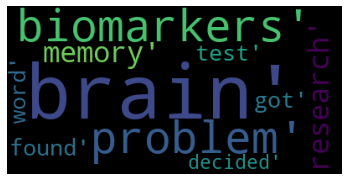

In [128]:
text = common

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

<AxesSubplot:>

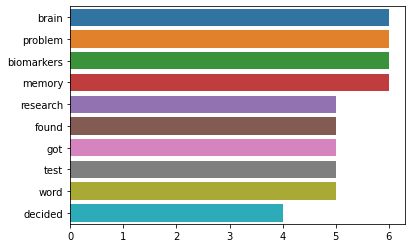

In [125]:
x, y= [], []
for word,count in common:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

##### Project 2

In [129]:
wordz = []
for w in tokenized_df['transcripto'][1]:
    wordz.append(w)

len(wordz)

557

In [130]:
c = C(wordz)
common = c.most_common(10)
common

[('scent', 28),
 ('stress', 10),
 ('fashion', 8),
 ('project', 8),
 ('lot', 8),
 ('sort', 8),
 ('bipolar', 7),
 ('sleep', 7),
 ('help', 7),
 ('reduce', 6)]

<AxesSubplot:>

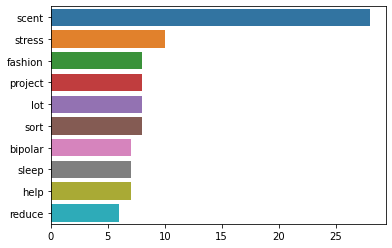

In [131]:
x, y= [], []
for word,count in common:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

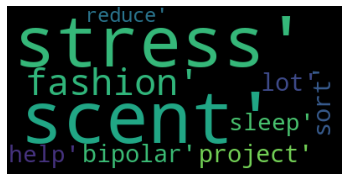

In [132]:
text = common

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

##### Project 3

In [133]:
wordz = []
for w in tokenized_df['transcripto'][2]:
    wordz.append(w)

len(wordz)

348

In [134]:
c = C(wordz)
common = c.most_common(10)
common

[('sleep', 12),
 ('weight', 11),
 ('assumption', 8),
 ('calorie', 8),
 ('important', 7),
 ('tracking', 6),
 ('use', 5),
 ('quality', 5),
 ('driven', 5),
 ('fat', 5)]

<AxesSubplot:>

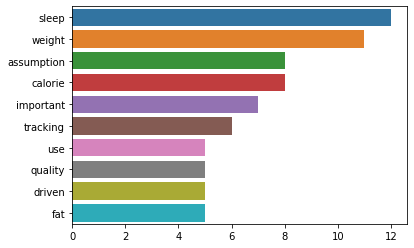

In [135]:
x, y= [], []
for word,count in common:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

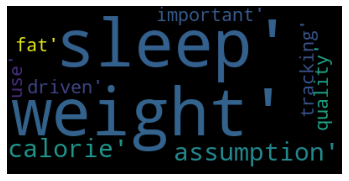

In [136]:
text = common

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Calculate frequency num for each word


In [ ]:
import gensim

dictionary = gensim.corpora.Dictionary(tokenized_df['transcripto'])
print(dictionary.token2id)

In [421]:
def freq_calc(words):
    word_frequencies = {}
    for word in words:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1
    return word_frequencies

In [517]:
tokenized_df['transcripto']

0      ['mark', 'going', 'publicly', 'tell', 'story',...
1      ['jenny', 'going', 'talk', 'science', 'fashion...
2      ['kouris', 'kalligas', 'run', 'startup', 'call...
3      ['steven', 'jonas', 'memorizing', 'dayboook', ...
4      ['justin', 'timmer', 'lazy', 'workoutwelcome',...
                             ...                        
334    ['justin', 'lawlertracking', 'glucose', 'perso...
335    ['thomas', 'blomseth', 'christiansen', 'talk',...
336    ['mikey', 'sklar', 'marathons', 'zero', 'calor...
337    ['inspired', 'research', 'shows', 'blood', 'su...
338    ['eric', 'jain', 'devices', 'track', 'location...
Name: transcripto, Length: 339, dtype: object

In [ ]:
tokenized_df.transcripto

In [522]:
tokenized_df

transcript  \
0    [hello, im, mark, and, im, going, to, first, p...   
1    [im, jenny, and, im, going, to, talk, to, you,...   
2    [im, kouris, kalligas, i, run, a, startup, cal...   
3    [steven, jonas, memorizing, my, dayboook, hell...   
4    [justin, timmer, a, lazy, workoutwelcome, ever...   
..                                                 ...   
334  [justin, lawlertracking, glucose, as, a, perso...   
335  [im, thomas, blomseth, christiansen, and, i, w...   
336  [mikey, sklar, three, marathons, on, zero, cal...   
337  [inspired, by, research, that, shows, that, th...   
338  [eric, jain, was, using, five, devices, to, tr...   

                                           transcripto  \
0    ['mark', 'going', 'publicly', 'tell', 'story',...   
1    ['jenny', 'going', 'talk', 'science', 'fashion...   
2    ['kouris', 'kalligas', 'run', 'startup', 'call...   
3    ['steven', 'jonas', 'memorizing', 'dayboook', ...   
4    ['justin', 'timmer', 'lazy', 'workoutwelcome',...   
..                                                 ...   
334  ['justin', 'lawlertracking', 'glucose', 'perso...   
335  ['thomas', 'blomseth', 'christiansen', 'talk',...   
336  ['mikey', 'sklar', 'marathons', 'zero', 'calor...   
337  ['inspired', 'research', 'shows', 'blood', 'su...   
338  ['eric', 'jain', 'devices', 'track', 'location...   

                                                 tfidf  \
0    [0.03895833556201749, 0.037645535956162504, 0....   
1    [0.0, 0.027719063594910272, 0.0, 0.0, 0.0, 0.0...   
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3    [0.03627775404831116, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
..                                                 ...   
334  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
335  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
336  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
337  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
338  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                              card2vec  
0    [2.0156338214874268, 2.32627010345459, 0.07996...  
1    [3.1552605628967285, 1.5011563301086426, 2.106...  
2    [2.1470835208892822, 2.227510452270508, 2.0121...  
3    [3.6446456909179688, -0.3550342619419098, -1.4...  
4    [0.9926726222038269, 2.810518980026245, -0.723...  
..                                                 ...  
334  [2.7951467037200928, 2.2528066635131836, -0.31...  
335  [2.7828526496887207, -2.2911651134490967, -3.9...  
336  [-0.4062424600124359, 1.7435009479522705, -0.9...  
337  [0.9879779815673828, 0.8782642483711243, 0.070...  
338  [0.7648524641990662, 0.2785325348377228, -0.38...  

[339 rows x 4 columns]

In [456]:
word_frequencies = freq_calc(words)
word_frequencies

{'hello': 8,
 'im': 2120,
 'mark': 52,
 'and': 18761,
 'going': 1209,
 'to': 13033,
 'first': 708,
 'publicly': 5,
 'tell': 244,
 'my': 6327,
 'story': 134,
 'about': 2324,
 'brain': 149,
 'fog': 11,
 'which': 1456,
 'started': 704,
 'occurring': 6,
 'months': 263,
 'ago': 178,
 'i': 17476,
 'was': 5413,
 'at': 2515,
 'an': 1288,
 'organized': 14,
 'research': 145,
 'retreat': 4,
 'on': 3160,
 'orcas': 1,
 'island': 7,
 'with': 2596,
 'friends': 124,
 'mainly': 23,
 'colleagues': 14,
 'from': 1407,
 'europe': 9,
 'but': 2788,
 'amidst': 2,
 'this': 5275,
 'relaxing': 10,
 'serene': 1,
 'beauty': 3,
 'big': 293,
 'problems': 71,
 'were': 935,
 'revealed': 5,
 'the': 16094,
 'next': 318,
 'day': 1144,
 'so': 5811,
 'as': 1880,
 'we': 2329,
 'began': 40,
 'working': 326,
 'over': 653,
 'some': 1307,
 'of': 10985,
 'our': 496,
 'topics': 8,
 'writing': 55,
 'a': 11075,
 'resubmission': 1,
 'for': 3526,
 'nih': 1,
 'grant': 4,
 'became': 93,
 'difficult': 114,
 'me': 2153,
 'recall': 14,
 '

In [488]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

In [505]:
sentence_scores = {}
for sent in tokenized_df.transcripto:
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [506]:
sentence_scores

{"['nan']": 5.330206278982997e-05,
 "['eric', 'jain', 'devices', 'track', 'location', 'steps', 'workouts', 'heart', 'rate', 'environment', 'attempted', 'consolidate', 'devices', 'shares', 'new', 'device', 'worked', 'better', 'existing', 'ones']": 5.330206278982997e-05}

In [507]:
import heapq
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

summary = ' '.join(summary_sentences)
print(summary)

['nan'] ['eric', 'jain', 'devices', 'track', 'location', 'steps', 'workouts', 'heart', 'rate', 'environment', 'attempted', 'consolidate', 'devices', 'shares', 'new', 'device', 'worked', 'better', 'existing', 'ones']


In [492]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = tokenized_df.transcripto
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer2.get_feature_names())
print(X.toarray())

['aa nice', 'aaron parecki', 'aaron pique', 'aaron said', 'aaron talking', 'aaron theres', 'aaron yih', 'aaronparecki dot', 'aaronpareckicom want', 'aaronrowegmailcom twitter', 'ab far', 'ab raster', 'ab testing', 'aback asked', 'aback total', 'abandoned ambitious', 'abandoned months', 'abdomen core', 'abdomen doesnt', 'abdomen hold', 'abdomen liked', 'abdomen particularly', 'abdomen squeeze', 'abdomen tracked', 'abdominal pains', 'abdominals right', 'aberrant try', 'aberrations weekends', 'abilities find', 'abilities found', 'abilities hope', 'abilities ill', 'abilities measure', 'abilities possibilities', 'abilities trying', 'ability access', 'ability app', 'ability availability', 'ability behalf', 'ability brain', 'ability buffer', 'ability change', 'ability class', 'ability collect', 'ability compare', 'ability control', 'ability correct', 'ability course', 'ability distant', 'ability engaged', 'ability fully', 'ability heightened', 'ability know', 'ability learn', 'ability look', 

In [494]:
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

In [496]:
type(tokenized_df.transcripto)

pandas.core.series.Series

In [425]:
tokenized_df.transcripto=tokenized_df.transcripto.apply(str)

In [426]:
import texthero as hero
from texthero import preprocessing

tokenized_df['tfidf'] = (hero.tfidf(tokenized_df.transcripto, max_features=3000))

In [560]:
from gensim.models import word2vec


In [564]:
import numpy as np
#Create a list of lists
dtv= np.array(card2vec).tolist()
#set list to dataframe column
tokenized_df['cbard2vec'] = dtv
tokenized_df.head(2)

transcript  \
0  [hello, im, mark, and, im, going, to, first, p...   
1  [im, jenny, and, im, going, to, talk, to, you,...   

                                         transcripto  \
0  ['mark', 'going', 'publicly', 'tell', 'story',...   
1  ['jenny', 'going', 'talk', 'science', 'fashion...   

                                               tfidf  \
0  [0.03895833556201749, 0.037645535956162504, 0....   
1  [0.0, 0.027719063594910272, 0.0, 0.0, 0.0, 0.0...   

                                            card2vec  
0  [2.0156338214874268, 2.32627010345459, 0.07996...  
1  [3.1552605628967285, 1.5011563301086426, 2.106...

In [585]:
tokenized_df

transcript  \
0    [hello, im, mark, and, im, going, to, first, p...   
1    [im, jenny, and, im, going, to, talk, to, you,...   
2    [im, kouris, kalligas, i, run, a, startup, cal...   
3    [steven, jonas, memorizing, my, dayboook, hell...   
4    [justin, timmer, a, lazy, workoutwelcome, ever...   
..                                                 ...   
334  [justin, lawlertracking, glucose, as, a, perso...   
335  [im, thomas, blomseth, christiansen, and, i, w...   
336  [mikey, sklar, three, marathons, on, zero, cal...   
337  [inspired, by, research, that, shows, that, th...   
338  [eric, jain, was, using, five, devices, to, tr...   

                                           transcripto  \
0    ['mark', 'going', 'publicly', 'tell', 'story',...   
1    ['jenny', 'going', 'talk', 'science', 'fashion...   
2    ['kouris', 'kalligas', 'run', 'startup', 'call...   
3    ['steven', 'jonas', 'memorizing', 'dayboook', ...   
4    ['justin', 'timmer', 'lazy', 'workoutwelcome',...   
..                                                 ...   
334  ['justin', 'lawlertracking', 'glucose', 'perso...   
335  ['thomas', 'blomseth', 'christiansen', 'talk',...   
336  ['mikey', 'sklar', 'marathons', 'zero', 'calor...   
337  ['inspired', 'research', 'shows', 'blood', 'su...   
338  ['eric', 'jain', 'devices', 'track', 'location...   

                                                 tfidf  \
0    [0.03895833556201749, 0.037645535956162504, 0....   
1    [0.0, 0.027719063594910272, 0.0, 0.0, 0.0, 0.0...   
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3    [0.03627775404831116, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
..                                                 ...   
334  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
335  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
336  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
337  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
338  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                              card2vec  
0    [2.0156338214874268, 2.32627010345459, 0.07996...  
1    [3.1552605628967285, 1.5011563301086426, 2.106...  
2    [2.1470835208892822, 2.227510452270508, 2.0121...  
3    [3.6446456909179688, -0.3550342619419098, -1.4...  
4    [0.9926726222038269, 2.810518980026245, -0.723...  
..                                                 ...  
334  [2.7951467037200928, 2.2528066635131836, -0.31...  
335  [2.7828526496887207, -2.2911651134490967, -3.9...  
336  [-0.4062424600124359, 1.7435009479522705, -0.9...  
337  [0.9879779815673828, 0.8782642483711243, 0.070...  
338  [0.7648524641990662, 0.2785325348377228, -0.38...  

[339 rows x 4 columns]

In [595]:
tokenized_df.transcripto=tokenized_df.transcripto.apply(str)

In [539]:
X=model[model.wv.vocab]
df=pd.DataFrame(tokenized_df)
tokenized_df.shape
tokenized_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


transcript  \
0  [hello, im, mark, and, im, going, to, first, p...   
1  [im, jenny, and, im, going, to, talk, to, you,...   
2  [im, kouris, kalligas, i, run, a, startup, cal...   
3  [steven, jonas, memorizing, my, dayboook, hell...   
4  [justin, timmer, a, lazy, workoutwelcome, ever...   

                                         transcripto  \
0  ['mark', 'going', 'publicly', 'tell', 'story',...   
1  ['jenny', 'going', 'talk', 'science', 'fashion...   
2  ['kouris', 'kalligas', 'run', 'startup', 'call...   
3  ['steven', 'jonas', 'memorizing', 'dayboook', ...   
4  ['justin', 'timmer', 'lazy', 'workoutwelcome',...   

                                               tfidf  \
0  [0.03895833556201749, 0.037645535956162504, 0....   
1  [0.0, 0.027719063594910272, 0.0, 0.0, 0.0, 0.0...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.03627775404831116, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                            card2vec  
0  [2.0156338214874268, 2.32627010345459, 0.07996...  
1  [3.1552605628967285, 1.5011563301086426, 2.106...  
2  [2.1470835208892822, 2.227510452270508, 2.0121...  
3  [3.6446456909179688, -0.3550342619419098, -1.4...  
4  [0.9926726222038269, 2.810518980026245, -0.723...

In [529]:
tokenized_df.transcripto

0      ['mark', 'going', 'publicly', 'tell', 'story',...
1      ['jenny', 'going', 'talk', 'science', 'fashion...
2      ['kouris', 'kalligas', 'run', 'startup', 'call...
3      ['steven', 'jonas', 'memorizing', 'dayboook', ...
4      ['justin', 'timmer', 'lazy', 'workoutwelcome',...
                             ...                        
334    ['justin', 'lawlertracking', 'glucose', 'perso...
335    ['thomas', 'blomseth', 'christiansen', 'talk',...
336    ['mikey', 'sklar', 'marathons', 'zero', 'calor...
337    ['inspired', 'research', 'shows', 'blood', 'su...
338    ['eric', 'jain', 'devices', 'track', 'location...
Name: transcripto, Length: 339, dtype: object

In [427]:
tokenized_df['tfidf']

0      [0.03895833556201749, 0.037645535956162504, 0....
1      [0.0, 0.027719063594910272, 0.0, 0.0, 0.0, 0.0...
2      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3      [0.03627775404831116, 0.0, 0.0, 0.0, 0.0, 0.0,...
4      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                             ...                        
334    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
335    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
336    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
337    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
338    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: tfidf, Length: 339, dtype: object

In [428]:
tokenized_df.transcripto=tokenized_df.transcripto.apply(str)

In [430]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#tokenize and tag the card text
card_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(tokenized_df.transcripto)]
#display the tagged docs
card_docs

[TaggedDocument(words=["['mark',", "'going',", "'publicly',", "'tell',", "'story',", "'brain',", "'fog',", "'started',", "'occurring',", "'months',", "'ago',", "'organized',", "'research',", "'retreat',", "'orcas',", "'island',", "'friends',", "'mainly',", "'research',", "'colleagues',", "'europe',", "'amidst',", "'relaxing',", "'serene',", "'beauty',", "'big',", "'problems',", "'revealed',", "'began',", "'working',", "'research',", "'topics',", "'writing',", "'resubmission',", "'nih',", "'grant',", "'difficult',", "'recall',", "'details',", "'main',", "'research',", "'topics',", "'difficult',", "'type',", "'summaries',", "'discussion',", "'hide',", "'poorly',", "'feeling',", "'fog',", "'couldnt',", "'recall',", "'items',", "'alljust',", "'research',", "'retreat',", "'decided',", "'general',", "'medical',", "'physical',", "'cardiology',", "'reevaluation',", "'visited',", "'primary',", "'care',", "'md',", "'visited',", "'cardiologist',", "'told',", "'mark',", "'values',", "'normal',", "

In [431]:
model = Doc2Vec(vector_size=64, min_count=1, epochs = 20)

In [432]:
#instantiate model
model = Doc2Vec(vector_size=64, window=2, min_count=1, workers=8, epochs = 40)
#build vocab
model.build_vocab(card_docs)
#train model
model.train(card_docs, total_examples=model.corpus_count
            , epochs=model.epochs)

In [433]:
#generate vectors
card2vec = [model.infer_vector((tokenized_df['transcripto'][i].split(' '))) 
            for i in range(0,len(tokenized_df['transcripto']))]
card2vec

[array([ 2.0156338 ,  2.32627   ,  0.07996698,  1.766498  ,  2.4782095 ,
         0.83331263,  2.1244893 , -2.7466626 , -2.687272  , -1.0828786 ,
         0.9866476 , -1.6133521 , -0.3775447 ,  1.1774797 , -0.32948637,
         1.828087  ,  0.24795839,  0.9391772 ,  1.8068897 , -1.402824  ,
         0.09709956, -0.26532826, -4.2630353 ,  1.0151836 , -2.152901  ,
         3.6547043 , -0.04673446,  1.289167  , -0.89516246, -0.07694711,
         0.39562264, -3.002417  ,  0.3882171 , -0.27026772,  6.099454  ,
         2.165467  ,  1.4824708 , -4.1079235 , -1.9704167 ,  0.16731082,
        -1.3415356 , -2.8684986 ,  0.87082875,  4.867358  , -1.252129  ,
        -1.1733984 , -2.0928016 , -1.4772444 , -2.461655  , -2.244534  ,
        -0.11064272,  2.1259828 , -1.5425045 , -1.1622235 , -3.279975  ,
         2.770426  ,  3.2387102 ,  0.28531772,  4.924009  ,  2.2627232 ,
        -4.6440396 , -1.1116055 , -1.5859084 ,  0.00894053], dtype=float32),
 array([ 3.1552606 ,  1.5011563 ,  2.106926  , 

In [435]:
import numpy as np
#Create a list of lists
dtv= np.array(card2vec).tolist()
#set list to dataframe column
tokenized_df['card2vec'] = dtv
tokenized_df.head(2)

transcript  \
0  [hello, im, mark, and, im, going, to, first, p...   
1  [im, jenny, and, im, going, to, talk, to, you,...   

                                         transcripto  \
0  ['mark', 'going', 'publicly', 'tell', 'story',...   
1  ['jenny', 'going', 'talk', 'science', 'fashion...   

                                               tfidf  \
0  [0.03895833556201749, 0.037645535956162504, 0....   
1  [0.0, 0.027719063594910272, 0.0, 0.0, 0.0, 0.0...   

                                            card2vec  
0  [2.0156338214874268, 2.32627010345459, 0.07996...  
1  [3.1552605628967285, 1.5011563301086426, 2.106...

### Calculate score of words in sentences

In [6]:
sentence_scores = {}
for word_list in tokenized_df.transcriptno:
    for word in word_list:
        if word in word_frequencies.keys():
            if len(word.split(' ')) < 30:
                if word not in sentence_scores.keys():
                    sentence_scores[word] = word_frequencies[word]
                else:
                    sentence_scores[word] += word_frequencies[word]

NameError: name 'tokenized_df' is not defined

In [7]:
sentence_scores

{}

In [8]:
import heapq
summary_sentences = heapq.nlargest(100, sentence_scores, key=sentence_scores.get)

summary = ' '.join(summary_sentences)
print(summary)

### Word cloud

In [692]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


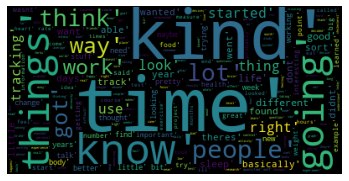

In [476]:
text = tokenized_df['transcripto'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

## Frequency 

In [483]:
topics = ('chronic condition','cognition','diet','weight loss', 'environment', 'food tracking'  ,'genome' , 'microbiome' , 'heart rate' ,'cardiovascular',  'location' ,  'media'  ,'metabolism',  'money'  ,  'mood' , 'emotion'  , 'other'  , 'ovulatory cycle' ,'pregnancy','productivity','sleep','social life','social media','sports','fitness','stress')

In [487]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(topics)
data_cv = cv.fit_transform(tokenized_df['transcripto'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

aa  aaron  aaronparecki  aaronpareckicom  aaronrowegmailcom  ab  aback  \
0     0      0             0                0                  0   0      0   
1     0      0             0                0                  0   0      0   
2     0      0             0                0                  0   0      0   
3     0      0             0                0                  0   0      0   
4     0      0             0                0                  0   0      0   
..   ..    ...           ...              ...                ...  ..    ...   
334   0      0             0                0                  0   0      0   
335   0      0             0                0                  0   0      0   
336   0      0             0                0                  0   0      0   
337   0      0             0                0                  0   0      0   
338   0      0             0                0                  0   0      0   

     abandoned  abdomen  abdominal  ...  zoomable  zoomed  zooming  \
0            0        0          0  ...         0       0        0   
1            0        0          0  ...         0       0        0   
2            0        0          0  ...         0       0        0   
3            0        0          0  ...         0       0        0   
4            0        5          0  ...         0       0        0   
..         ...      ...        ...  ...       ...     ...      ...   
334          0        0          0  ...         0       0        0   
335          0        0          0  ...         0       0        0   
336          0        0          0  ...         0       0        0   
337          0        0          0  ...         0       0        0   
338          0        0          0  ...         0       0        0   

     zuckermans  zurich  µbiome  µbiomes  åland  ōura  μbiome  
0             0       0       0        0      0     0       0  
1             0       0       0        0      0     0       0  
2             0       0       0        0      0     0       0  
3             0       0       0        0      0     0       0  
4             0       0       0        0      0     0       0  
..          ...     ...     ...      ...    ...   ...     ...  
334           0       0       0        0      0     0       0  
335           0       0       0        0      0     0       0  
336           0       0       0        0      0     0       0  
337           0       0       0        0      0     0       0  
338           0       0       0        0      0     0       0  

[339 rows x 18479 columns]